In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [4]:
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-04-07,75.431427,75.842857,74.555717,74.781425,66.127869,72462600\n2014-04-08,75.027145,75.160004,74.099998,74.777145,66.124092,60972100\n2014-04-09,74.662857,75.784286,74.574287,75.760002,66.993195,51542400\n2014-04-10,75.811432,76.034286,74.738571,74.782860,66.129150,59913000\n2014-04-11,74.142860,74.690002,73.877144,74.230003,65.640236,67929400\n2014-04-14,74.557144,74.594284,73.887146,74.525711,65.901756,51418500\n2014-04-15,74.324287,74.519997,73.047142,73.994286,65.431808,66622500\n2014-04-16,74.007141,74.441429,73.448570,74.144287,65.564453,53691400\n2014-04-17,74.285713,75.394287,74.171425,74.991432,66.313568,71083600\n2014-04-21,75.048569,76.019997,74.851425,75.881432,67.100571,45637200\n2014-04-22,75.472855,75.975716,75.214287,75.957146,67.167534,50640800\n2014-04-23,75.580002,75.875717,74.921425,74.964287,66.289574,98735000\n2014-04-24,81.172859,81.428574,80.104286,81.110001,71.724113,189977900\n2014-04-25,80.6471

In [5]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-07,75.431427,75.842857,74.555717,74.781425,66.127869,72462600
1,2014-04-08,75.027145,75.160004,74.099998,74.777145,66.124092,60972100
2,2014-04-09,74.662857,75.784286,74.574287,75.760002,66.993195,51542400
3,2014-04-10,75.811432,76.034286,74.738571,74.782860,66.129150,59913000
4,2014-04-11,74.142860,74.690002,73.877144,74.230003,65.640236,67929400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
data.head()

,Date,Adj Close
0,2014-04-07,66.127869
1,2014-04-08,66.124092
2,2014-04-09,66.993195
3,2014-04-10,66.129150
4,2014-04-11,65.640236


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
Date         1259 non-null datetime64[ns]
Adj Close    1259 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [10]:
data = data.set_index(['Date'], drop=True)
data.head()

,Adj Close
Date,
2014-04-07,66.127869
2014-04-08,66.124092
2014-04-09,66.993195
2014-04-10,66.129150
2014-04-11,65.640236


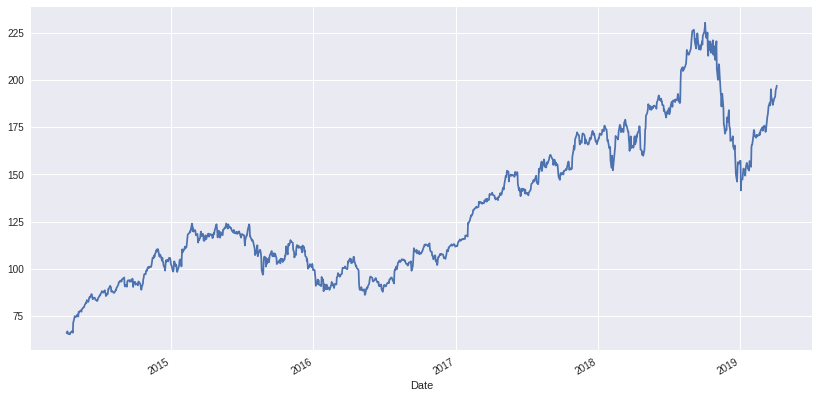

In [11]:
data['Adj Close'].plot(figsize=(14,7))

In [12]:
split_date = pd.Timestamp('2018-01-01')

data = data['Adj Close'] #converting dataframe to series
data.head()

Date
2014-04-07    66.127869
2014-04-08    66.124092
2014-04-09    66.993195
2014-04-10    66.129150
2014-04-11    65.640236
Name: Adj Close, dtype: float64

In [13]:
type(data)

pandas.core.series.Series

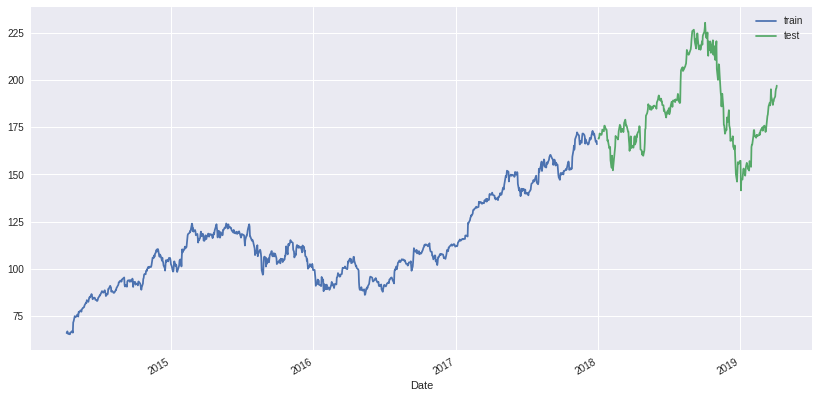

In [14]:
train = data.loc[:split_date]
test = data.loc[split_date:]

plt.figure(figsize=(14,7))

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [15]:
train.head()

Date
2014-04-07    66.127869
2014-04-08    66.124092
2014-04-09    66.993195
2014-04-10    66.129150
2014-04-11    65.640236
Name: Adj Close, dtype: float64

In [0]:
x_train = train.values.reshape(-1,1)
x_test = test.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

In [18]:
X_train = scaled_train[:-1]
y_train = scaled_train[1:]
X_train

array([[-9.87066448e-01],
       [-9.87136628e-01],
       [-9.70987772e-01],
       [-9.87042645e-01],
       [-9.96127186e-01],
       [-9.91267867e-01],
       [-1.00000000e+00],
       [-9.97535315e-01],
       [-9.83615963e-01],
       [-9.68992611e-01],
       [-9.67748368e-01],
       [-9.84061797e-01],
       [-8.83082292e-01],
       [-8.73294308e-01],
       [-8.21302286e-01],
       [-8.25433246e-01],
       [-8.30691204e-01],
       [-8.27428555e-01],
       [-8.24846345e-01],
       [-8.05176136e-01],
       [-8.20550812e-01],
       [-8.25433246e-01],
       [-7.79788348e-01],
       [-7.85771710e-01],
       [-7.67967652e-01],
       [-7.65696340e-01],
       [-7.65428123e-01],
       [-7.77761005e-01],
       [-7.56538218e-01],
       [-7.39247184e-01],
       [-7.38954309e-01],
       [-7.35046489e-01],
       [-7.32702023e-01],
       [-7.15948279e-01],
       [-6.87862911e-01],
       [-6.91818930e-01],
       [-6.64050964e-01],
       [-6.69863492e-01],
       [-6.8

In [20]:
X_test = scaled_test[:-1]
y_test = scaled_test[1:]
X_test

array([[0.92417137],
       [0.92362446],
       [0.93820725],
       [0.97411649],
       [0.96226827],
       [0.96190366],
       [0.96117444],
       [0.9792202 ],
       [1.01221311],
       [0.99580809],
       [1.04885156],
       [1.0517679 ],
       [1.03718567],
       [1.01057262],
       [1.01130158],
       [0.9598983 ],
       [0.90320898],
       [0.9105001 ],
       [0.84579073],
       [0.82774525],
       [0.83612992],
       [0.8425098 ],
       [0.70980956],
       [0.63671553],
       [0.75592623],
       [0.69231042],
       [0.61228961],
       [0.64688128],
       [0.76218617],
       [0.7920189 ],
       [0.84747488],
       [0.95033444],
       [0.94008503],
       [0.9294696 ],
       [0.91519386],
       [0.94136599],
       [0.99627307],
       [1.05978256],
       [1.0491674 ],
       [1.04422529],
       [0.98712204],
       [1.00926814],
       [1.02043248],
       [1.01768711],
       [0.98767122],
       [1.02262867],
       [1.0782678 ],
       [1.110

In [21]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
941/941 [==============================] - 5s 6ms/step - loss: 0.1383
Epoch 2/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 3/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 4/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0020
Epoch 5/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 6/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 7/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 8/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 9/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 10/100
941/941 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 11/100
941/941 [==============================] - 3s 

In [22]:
y_pred_test_nn = model.predict(X_test)
y_train_pred_nn = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.961
The R2 score on the Test set is:	0.798


In [24]:
test_mse = model.evaluate(X_test, y_test, batch_size=1)
print('Neural Network: {}'.format(test_mse))

316/316 [==============================] - 0s 919us/step
Neural Network: 0.029739656779612773


In [0]:
y_pred_test = model.predict(X_test)

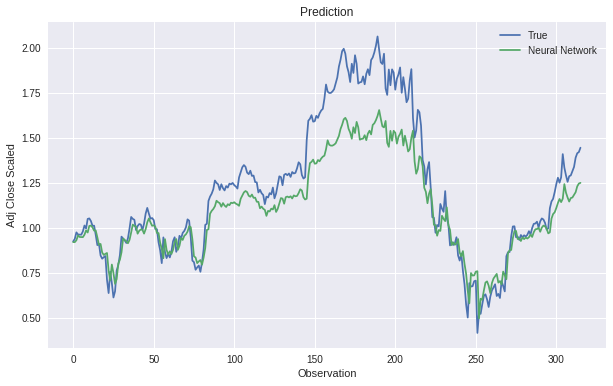

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='Neural Network')
plt.title("Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();